In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
diabetes = load_diabetes()

# Method 1: Directly from dataset
print("Feature Names:")
print(diabetes.feature_names)

# Method 2: Convert to DataFrame (recommended)
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

print("\nColumn Names from DataFrame:")
print(df.columns.tolist())


Feature Names:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Column Names from DataFrame:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Slope (b1): 998.5776891375596
Intercept (b0): 152.00335421448167


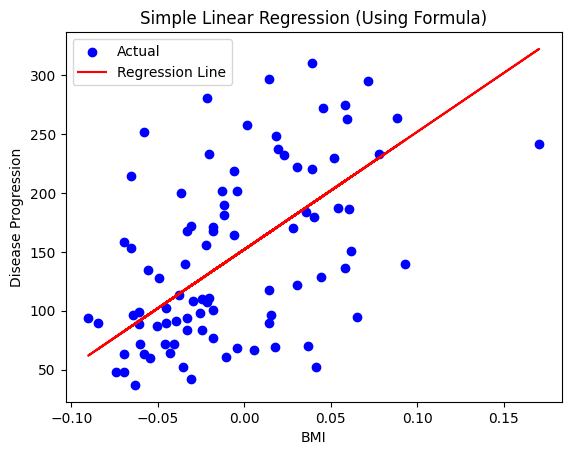

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2]   # BMI feature
y = diabetes.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------- FORMULA IMPLEMENTATION -----------

mean_x = np.mean(X_train)
mean_y = np.mean(y_train)

mean_xy = np.mean(X_train * y_train)
mean_x2 = np.mean(X_train * X_train)

# Calculate b1 (slope)
b1 = (mean_xy - mean_x * mean_y) / (mean_x2 - mean_x**2)

# Calculate b0 (intercept)
b0 = mean_y - b1 * mean_x

print("Slope (b1):", b1)
print("Intercept (b0):", b0)

# Prediction
y_pred = b0 + b1 * X_test

# Plot
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression (Using Formula)")
plt.legend()
plt.show()


In [3]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
diabetes = load_diabetes()
X = diabetes.data        # 10 features
Y = diabetes.target

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Add column of 1s for intercept term (bias)
ones = np.ones((X_train.shape[0], 1))
X_train_b = np.hstack((ones, X_train))

ones_test = np.ones((X_test.shape[0], 1))
X_test_b = np.hstack((ones_test, X_test))

# -------- Least Squares Formula ----------
# b = (X^T X)^(-1) X^T Y

X_transpose = X_train_b.T
b = np.linalg.inv(X_transpose.dot(X_train_b)).dot(X_transpose).dot(Y_train)

print("Regression Coefficients (including intercept):")
print(b)

# Predictions
Y_pred = X_test_b.dot(b)

# Evaluation
print("R2 Score:", r2_score(Y_test, Y_pred))


Regression Coefficients (including intercept):
[ 151.34560454   37.90402135 -241.96436231  542.42875852  347.70384391
 -931.48884588  518.06227698  163.41998299  275.31790158  736.1988589
   48.67065743]
R2 Score: 0.4526027629719198
